# TSF GRIP TASKS

## Data Science and Business Analytics 

### Task1 : prediction using Supervised ML


### Problem Statement - To predict the percentage of an student based on the no. of study hours

### Prepared by - Kalyanasundaram B

In [68]:
## Imporing the required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [85]:
## Reading the data from the link provided and storing it as a dataFrame
df = pd.read_csv('http://bit.ly/w-data')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [87]:
## Finding The Correlation between the Variables
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**PLOTTING THE GIVEN DATA**

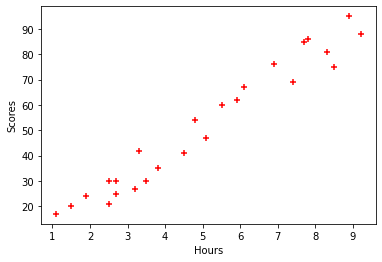

In [71]:
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.scatter(df.Hours,df.Scores,color='red',marker='+')

In [72]:
Hours = df.drop('Scores',axis='columns')
Hours.head()


,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5


In [73]:
Scores = df.Scores
Scores.head()

0    21
1    47
2    27
3    75
4    30
Name: Scores, dtype: int64

__Creating linear regression object__

In [74]:
reg = linear_model.LinearRegression()
reg.fit(Hours,Scores)

LinearRegression()

__Making Predictions using LinearRegression model__

In [75]:
hour = 9.25
predicted_score = reg.predict([[hour]])
print(" predicted score is {}".format(predicted_score[0]))

 predicted score is 92.9098547701573


**Evaluation of the Model to know how close our predicted Score are**

In [76]:
## dividing the data set into training data and test data 
from sklearn.model_selection import train_test_split  
H_train, H_test, S_train, S_test = train_test_split(Hours, Scores, 
                            test_size=0.2, random_state=0) 

In [77]:
reg.fit(H_train,S_train)

LinearRegression()

### Y = m * X + b (m is coefficient and b is intercept)

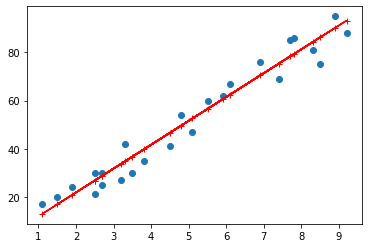

In [89]:

reg_line = reg.coef_*Hours+reg.intercept_

plt.scatter(Hours,Scores)
plt.plot(Hours,reg_line,color='red',marker='+')
plt.show()

In [90]:
test_pred = reg.predict(H_test) # Predicting the scores for Test Data 


In [80]:
## Comparing the Actuals scores and predicted Scores
X = S_test.values.tolist()
cols = {"Actual Values" : X, "Predicted Values" : test_pred}
df1 = pd.DataFrame.from_dict(cols)
df1 

,Actual Values,Predicted Values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Finding the Mean Absolute Error of the predicted scores**

In [81]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(S_test, test_pred)) 

Mean Absolute Error: 4.183859899002982
